In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
dat = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")

In [8]:
dat = dat.assign(id_char = dat.id.astype(str))
icv = dat.groupby(['id']).volume.sum().reset_index().rename(columns = {'volume' : 'icv'})
dat = pd.merge(dat, icv, on = 'id')
dat = dat.assign(comp = dat.volume / dat.icv)
dat.head()

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv_x,tbv,icv_y,id_char,icv,comp
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519,13783255,127,13783255,0.038533
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519,13783255,127,13783255,0.039425
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519,13783255,127,13783255,0.000703
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519,13783255,127,13783255,0.000702
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519,13783255,127,13783255,0.000745


In [7]:
url = "https://raw.githubusercontent.com/bcaffo/MRIcloudT1volumetrics/master/inst/extdata/multilevel_lookup_table.txt"
multilevel_lookup = pd.read_csv(url, sep = "\t").drop(['Level5'], axis = 1)
multilevel_lookup = multilevel_lookup.rename(columns = {
    "modify"   : "roi", 
    "modify.1" : "level4",
    "modify.2" : "level3", 
    "modify.3" : "level2",
    "modify.4" : "level1"})
multilevel_lookup = multilevel_lookup[['roi', 'level4', 'level3', 'level2', 'level1']]
multilevel_lookup.head()

,roi,level4,level3,level2,level1
0,SFG_L,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L
1,SFG_R,SFG_R,Frontal_R,CerebralCortex_R,Telencephalon_R
2,SFG_PFC_L,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L
3,SFG_PFC_R,SFG_R,Frontal_R,CerebralCortex_R,Telencephalon_R
4,SFG_pole_L,SFG_L,Frontal_L,CerebralCortex_L,Telencephalon_L


In [16]:
subjectData = pd.read_csv("https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv")
subjectData = subjectData.loc[(subjectData.type == 1) & (subjectData.level == 5) & (subjectData.id == 127)]
subjectData = subjectData[['roi', 'volume']]
## Merge the subject data with the multilevel data
subjectData = pd.merge(subjectData, multilevel_lookup, on = "roi")
subjectData = subjectData.assign(icv = "ICV")
subjectData = subjectData.assign(comp = subjectData.volume / np.sum(subjectData.volume))
subjectData.level2.unique()

array(['CerebralCortex_L', 'CerebralCortex_R', 'CerebralNucli_L',
       'CerebralNucli_R', 'Thalamus_L', 'Thalamus_R', 'BasalForebrain_L',
       'BasalForebrain_R', 'Mesencephalon_L', 'Mesencephalon_R',
       'Metencephalon_R', 'Metencephalon_L', 'Myelencephalon_L',
       'Myelencephalon_R', 'WhiteMatter_L', 'WhiteMatter_R', 'Ventricle',
       'Sulcus_L', 'Sulcus_R', 'Ventricle '], dtype=object)

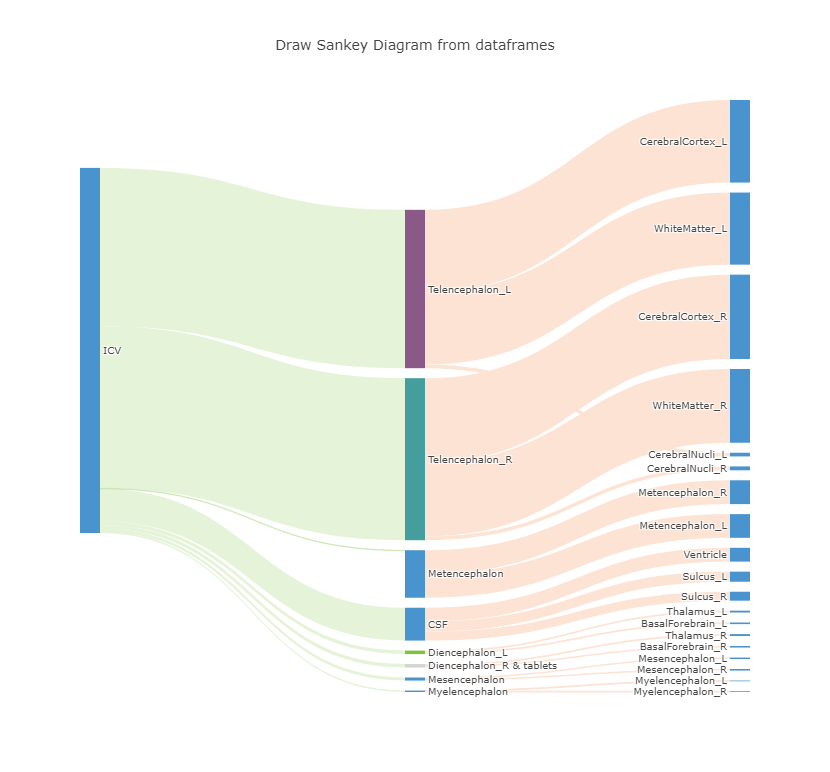

In [25]:
nodes = [['ID', 'Label', 'Color'],
        [0,'ICV','#4994CE'],
        [1,'Telencephalon_L','#8A5988'],
        [2,'Telencephalon_R','#449E9E'],
        [3,'Diencephalon_L','#7FC241'],
        [4,'Diencephalon_R & tablets','#D3D3D3'],
        [5,'Mesencephalon','#4994CE'],
        [6,'Metencephalon','#4994CE'],
        [7,'Myelencephalon','#4994CE'],
        [8,'CSF','#4994CE'], 
         # end level 1
        [9,'CerebralCortex_L','#4994CE'],
        [10,'CerebralCortex_R','#4994CE'],
        [11,'CerebralNucli_L','#4994CE'],
        [12,'CerebralNucli_R','#4994CE'],
        [13,'Thalamus_L','#4994CE'],
        [14,'Thalamus_R','#4994CE'],
        [15,'BasalForebrain_L','#4994CE'],
        [16,'BasalForebrain_R','#4994CE'],
        [17,'Mesencephalon_L','#4994CE'],
        [18,'Mesencephalon_R','#4994CE'],
        [19,'Metencephalon_R','#4994CE'],
        [20,'Metencephalon_L','#4994CE'],
        [21,'Myelencephalon_L','#4994CE'],
        [22,'Myelencephalon_R','#4994CE'],
        [23,'WhiteMatter_L','#4994CE'],
        [24,'WhiteMatter_R','#4994CE'],
        [25,'Ventricle','#4994CE'],
        [26,'Sulcus_L','#4994CE'],
        [27,'Sulcus_R','#4994CE']]

links = [['Source','Target','Value','Link Color'],

        # ICV
        [0,1,.3842,'rgba(127, 194, 65, 0.2)'],
        [0,2,.3931,'rgba(127, 194, 65, 0.2)'],
        [0,3,.0085,'rgba(127, 194, 65, 0.2)'],
        [0,4,.0083,'rgba(127, 194, 65, 0.2)'],
        [0,5,.0074,'rgba(127, 194, 65, 0.2)'],
        [0,6,.0015,'rgba(127, 194, 65, 0.2)'],
        [0,7,.0035,'rgba(127, 194, 65, 0.2)'],
        [0,8,.0794,'rgba(127, 194, 65, 0.2)'],

        # Level 1 to Level 2
         # tel_l
        [1,9,.2003,'rgba(253, 227, 212, 1)'],
        [1,23,.1749,'rgba(253, 227, 212, 1)'],
        [1,11,.0089,'rgba(253, 227, 212, 1)'],
         
         # tel_R
        [2,10,.2046,'rgba(253, 227, 212, 1)'],
        [2,24,.1790,'rgba(253, 227, 212, 1)'],
        [2,12,.0094,'rgba(253, 227, 212, 1)'],
         
         #met
        [6,19,.0578,'rgba(253, 227, 212, 1)'],
        [6,20,.0575,'rgba(253, 227, 212, 1)'],
       
        # CSF
        [8,25,.0335,'rgba(253, 227, 212, 1)'],
        [8,26,.0245,'rgba(253, 227, 212, 1)'],
        [8,27,.0217,'rgba(253, 227, 212, 1)'],

        # Die_L
        [3,13,.0045,'rgba(253, 227, 212, 1)'],
        [3,15,.0039,'rgba(253, 227, 212, 1)'],
        
        #Die  R
        [4,14,.0046,'rgba(253, 227, 212, 1)'],
        [4,16,.0037,'rgba(253, 227, 212, 1)'],
        
        #MEs
        [5,17,.0035,'rgba(253, 227, 212, 1)'],
        [5,18,.0038,'rgba(253, 227, 212, 1)'],        
        
         #Mye
         
        [7,21,.0017,'rgba(253, 227, 212, 1)'],
        [7,22,.0018,'rgba(253, 227, 212, 1)']
        ]

# Retrieve headers and build dataframes
nodes_headers = nodes.pop(0)
links_headers = links.pop(0)
df_nodes = pd.DataFrame(nodes, columns = nodes_headers)
df_links = pd.DataFrame(links, columns = links_headers)

# Sankey plot setup
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
    # thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  df_nodes['Label'].dropna(axis=0, how='any'),
      color = df_nodes['Color']
    ),
    link = dict(
      source = df_links['Source'].dropna(axis=0, how='any'),
      target = df_links['Target'].dropna(axis=0, how='any'),
      value = df_links['Value'].dropna(axis=0, how='any'),
      color = df_links['Link Color'].dropna(axis=0, how='any'),
  )
)

layout = dict(
        title = "Draw Sankey Diagram from dataframes",
    height = 772,
    font = dict(
      size = 10),)

fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)


Link to site: 